This is probably most primitive example of Pytorch In Action, Here we create some synthetic data and build and train Logistic Regression Model. To understand more about logistic regression I hoghly suggest watching this video https://www.youtube.com/watch?v=yIYKR4sgzI8. I will be uploading a complete notebook about how logistic regression works and how its loss function is derived shortly, in another repo titled ML as soon as I get some time.

If you are beginner lots of things will go over your head. The point of this notebook is to show how you train models with Pytorch. Basic flow will remain same. you can look up methods and functions used here, or you will get familiar as you code more anyways

In [11]:
# Step 1: Import Required Libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [12]:
# Step 2: Generate Synthetic Data
# Generate a 2D binary classification dataset
# In next notebooks I will cover working with different kinds of inputs tabular, text, images, videos, medical images like MRIs etc
X, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=2,    # Number of features
    n_informative=2, # Informative features
    n_redundant=0,   # No redundant features
    n_clusters_per_class=1,
    random_state=42  # For reproducibility
)

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [13]:
# Step 3: Define the Logistic Regression Model
# you can do this even without a class but this is more standard way

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model
model = LogisticRegression(input_dim=2)

In [14]:
# Step 4: Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [15]:
# Step 5: Train the Model
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y.view(-1, 1))  # Reshape y to match outputs

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2833
Epoch [200/1000], Loss: 0.2599
Epoch [300/1000], Loss: 0.2521
Epoch [400/1000], Loss: 0.2485
Epoch [500/1000], Loss: 0.2466
Epoch [600/1000], Loss: 0.2455
Epoch [700/1000], Loss: 0.2447
Epoch [800/1000], Loss: 0.2442
Epoch [900/1000], Loss: 0.2439
Epoch [1000/1000], Loss: 0.2436


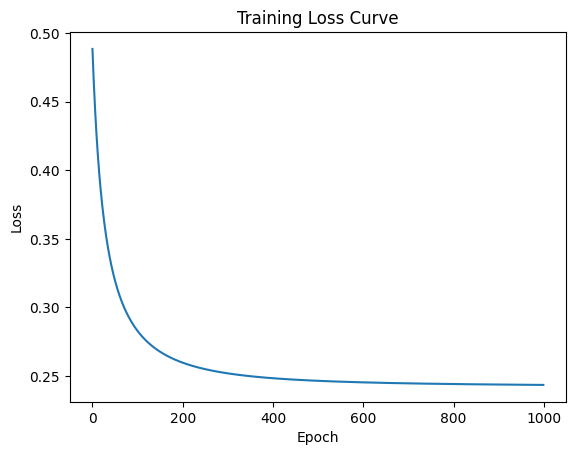

In [16]:
# Step 6: Plot the Training Loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

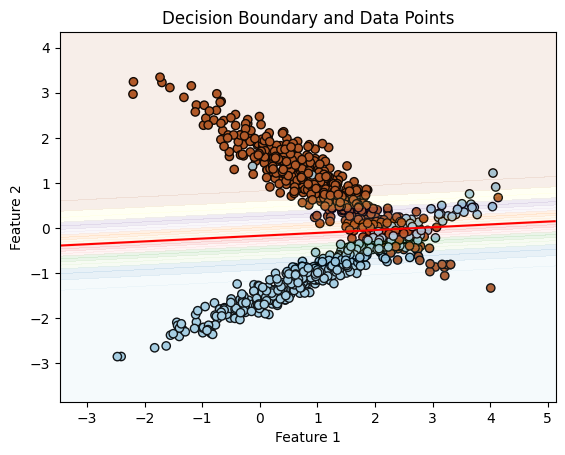

In [17]:
# Step 7: Visualize the Decision Boundary
# Extract weights and bias from the model
w = model.linear.weight.detach().numpy()[0]
b = model.linear.bias.detach().numpy()[0]

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Create a meshgrid for the decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                     np.linspace(x2_min, x2_max, 100))

# Compute decision boundary (w1*x1 + w2*x2 + b = 0)
Z = w[0] * xx + w[1] * yy + b
Z = 1 / (1 + np.exp(-Z))  # Apply sigmoid to get probabilities
Z = Z.reshape(xx.shape)

# Plot decision boundary and contour
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.contourf(xx, yy, Z, levels=25, cmap=plt.cm.Paired, alpha=0.1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.show()

In [18]:
# Step 8: Calculate Accuracy
with torch.no_grad():
    predictions = model(X).round()  # Threshold at 0.5
    accuracy = (predictions == y.view(-1, 1)).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 90.20%
